Подготовка данных

In [ ]:
# скачивание данных
!gdown --id 162dHRXIsKw8TTU_5leU3Oc1pHUcXH1qT

Downloading...
From: https://drive.google.com/uc?id=162dHRXIsKw8TTU_5leU3Oc1pHUcXH1qT
To: /content/Sample Task.zip
8.38MB [00:00, 130MB/s]


In [ ]:
# распаковка архивов
!unzip '/content/Sample Task.zip'

Archive:  /content/Sample Task.zip
  inflating: court_cases_sample.zip  
  inflating: df_accounts_sample.csv  
  inflating: df_bankruptcies_sample.csv  
  inflating: Описание задачи.docx  


In [ ]:
!unzip '/content/court_cases_sample.zip'

Archive:  /content/court_cases_sample.zip
   creating: success/
  inflating: success/7736609147_b.pkl  
  inflating: success/5028024427_b.pkl  
  inflating: success/7622005092.pkl  
  inflating: success/7455005950_b.pkl  
  inflating: success/2111000271_b.pkl  
  inflating: success/3607001642.pkl  
  inflating: success/5030002212_b.pkl  
  inflating: success/7415064205_b.pkl  
  inflating: success/2536163593.pkl  
  inflating: success/5019015634.pkl  
  inflating: success/5414100369_b.pkl  
  inflating: success/2347009476_b.pkl  
  inflating: success/4321000070_b.pkl  
  inflating: success/1429006530_b.pkl  
  inflating: success/3505003270.pkl  
  inflating: success/7722651420.pkl  
  inflating: success/6732030100_b.pkl  
  inflating: success/1001227084.pkl  
  inflating: success/6907010474_b.pkl  
  inflating: success/1701050442_b.pkl  
  inflating: success/7701651532_b.pkl  
  inflating: success/4029028408.pkl  
  inflating: success/7326037640_b.pkl  
  inflating: success/4521003135.

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# загрузка таблицы с информацией о банкротстве
b = pd.read_csv('/content/df_bankruptcies_sample.csv',index_col='Unnamed: 0')
b.head(5).append(b.tail(5))

,bankrupt_id,bancrupt_year,inn
0,79546,2015,5620006322
1,76594,2015,2111008200
2,94301,2016,5414100369
3,93799,2019,2347009476
4,199671,2018,7224008489
101,530816,2021,7728812071
102,325608,2019,6154086295
103,339365,2020,6627020656
104,527279,2021,2465002653
105,444691,2020,2721208520


In [ ]:
# проверка равенства количества уникальных значений колонки bankrupt_id и количества записей в датасете. Они равны, это значит повторяющихся значений нет
b['bankrupt_id'].nunique() == b.shape[0]

True

In [ ]:
# проверка на наличие пустых значений
b.isna().sum()

bankrupt_id      0
bancrupt_year    0
inn              0
dtype: int64

In [ ]:
# загрузка таблицы с информацией о финансах компании
d = pd.read_csv('/content/df_accounts_sample.csv', index_col='Unnamed: 0')
d.head(5).append(d.tail(5))

,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei
0,2465002653,2012,0.0,113756,122240,384
1,3505003270,2012,21461.0,20211,81132,384
2,3517003250,2012,0.0,0,48063,384
3,5501078737,2012,0.0,288763,419522,384
4,6140019517,2012,0.0,0,11089,384
1030,7842353970,2020,0.0,2548,16411,384
1031,8908001998,2019,NaN,8636,130731,384
1032,8908001998,2020,NaN,14318,128891,384
1033,9102060446,2019,6000.0,229769,308868,384
1034,9102060446,2020,6000.0,198088,273486,384


In [ ]:
# проверка на наличие пустых значений
d.isna().sum()

inn                                    0
year                                   0
long_term_liabilities_fiscal_year     75
short_term_liabilities_fiscal_year     0
balance_assets_fiscal_year             0
okei                                   0
dtype: int64

In [ ]:
# в поле 'long_term_liabilities_fiscal_year' есть пустые значения. Они заполнены 0
d['long_term_liabilities_fiscal_year'] = d['long_term_liabilities_fiscal_year'].fillna(0)

In [ ]:
# соедение таблиц в один датафрейм
df = pd.merge(b,d,on='inn', how = 'outer')
df.head(5).append(df.tail(5))

,bankrupt_id,bancrupt_year,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei
0,79546.0,2015.0,5620006322,2012,5947.0,12606,69551,384
1,79546.0,2015.0,5620006322,2013,12362.0,10675,70727,384
2,79546.0,2015.0,5620006322,2014,12742.0,12675,19770,384
3,79546.0,2015.0,5620006322,2015,8855.0,11845,19980,384
4,76594.0,2015.0,2111008200,2013,0.0,409,409,384
1030,NaN,NaN,7713345804,2018,0.0,3542,2622,384
1031,NaN,NaN,7841475679,2014,360.0,272,285,384
1032,NaN,NaN,7841475679,2015,360.0,83,240,384
1033,NaN,NaN,7841475679,2016,365.0,3,80,384
1034,NaN,NaN,6311175195,2018,0.0,2086,4264,384


In [ ]:
# типы данных в получивщемся датафрейме
df.dtypes

bankrupt_id                           float64
bancrupt_year                         float64
inn                                     int64
year                                    int64
long_term_liabilities_fiscal_year     float64
short_term_liabilities_fiscal_year      int64
balance_assets_fiscal_year              int64
okei                                    int64
dtype: object

In [ ]:
# не все компании из получившегося списка банкроты. Поэтому пустые значения заполнены 0
df['bancrupt_year'] = df['bancrupt_year'].fillna(0) 

In [ ]:
# привожу поля "year" и "bancrupt_year" к одному типу
df['bancrupt_year'] = df['bancrupt_year'].astype(int)

In [ ]:
# формирование таргета. компания признается банкротом в том случае, если значение поля 'bancrupt_year' не равно 0 и текущий год равен году банкротства
df['flag'] = np.where(((df['bancrupt_year'] != 0) & (df['bancrupt_year'] == df['year'])), 1, 0)
df.sort_values(by = 'bancrupt_year').sample(5)

,bankrupt_id,bancrupt_year,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei,flag
458,274508.0,2020,7006005167,2015,0.0,20917,29175,384,0
984,NaN,0,2912005987,2013,0.0,495,458,384,0
600,432052.0,2020,1429006530,2019,50583.0,285672,338814,384,0
1005,NaN,0,7725781273,2020,0.0,26597,16606,384,0
195,134288.0,2017,2346012846,2015,0.0,14833,13437,384,0


In [ ]:
# рассмотрим количество значений получившейся целевой переменной. Заметен дисбаланс классов
df['flag'].value_counts()

0    971
1     64
Name: flag, dtype: int64

In [ ]:
# проработка единиц измерения. Поле "okei" на них указывает. В моей выборке есть только 383 и 384
df['okei'].value_counts()

384    1031
383       4
Name: okei, dtype: int64

In [ ]:
# столбец okei показывает единицы, в которых указаны баланс и задолженности, приведем их в единый вид (единицы измерения - тысячи)
df['long_term_liabilities_fiscal_year'] = np.where((df['okei'] == 383), df['long_term_liabilities_fiscal_year']/1000, df['long_term_liabilities_fiscal_year'])
df['short_term_liabilities_fiscal_year'] = np.where((df['okei'] == 383), df['short_term_liabilities_fiscal_year']/1000, df['short_term_liabilities_fiscal_year'])
df['balance_assets_fiscal_year'] = np.where((df['okei'] == 383), df['balance_assets_fiscal_year']/1000, df['balance_assets_fiscal_year'])
df[df['okei'] == 383]

,bankrupt_id,bancrupt_year,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei,flag
514,301683.0,2019,6907010474,2013,0.0,7470.741,5635.748,383,0
516,301683.0,2019,6907010474,2014,0.0,9263.182,5340.100,383,0
519,301683.0,2019,6907010474,2012,0.0,7470.741,5635.748,383,0
585,505936.0,2021,3814022520,2015,0.0,0.000,0.000,383,0


In [ ]:
""" если в тестовой выборке есть данные с okei = 385, раскоментируйте и запустите этот код """
#df['long_term_liabilities_fiscal_year'] = np.where((df['okei'] == 385), df['long_term_liabilities_fiscal_year']*1000, df['long_term_liabilities_fiscal_year'])
#df['short_term_liabilities_fiscal_year'] = np.where((df['okei'] == 385), df['short_term_liabilities_fiscal_year']*1000, df['short_term_liabilities_fiscal_year'])
#df['balance_assets_fiscal_year'] = np.where((df['okei'] == 385), df['balance_assets_fiscal_year']*1000, df['balance_assets_fiscal_year'])
#df[df['okei'] == 385]

' если в тестовой выборке есть данные с okei = 385, раскоментируйте и запустите этот код '

In [ ]:
df.drop('bankrupt_id', inplace=True, axis = 1) 
df.head(5)

,bancrupt_year,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei,flag
0,2015,5620006322,2012,5947.0,12606.0,69551.0,384,0
1,2015,5620006322,2013,12362.0,10675.0,70727.0,384,0
2,2015,5620006322,2014,12742.0,12675.0,19770.0,384,0
3,2015,5620006322,2015,8855.0,11845.0,19980.0,384,1
4,2015,2111008200,2013,0.0,409.0,409.0,384,0


In [ ]:
# трудно предсказать банкротство по однонму году, нужно рассмотреть фин. обязательства и баланс за предыдущие года. "Сдвиг" на 3 года добавлен в датасет. Groupby сделан по inn, чтобы захватывать данные по одной компании
df['long_term_liabilities_fiscal_year_1'] = df.groupby(['inn'])['long_term_liabilities_fiscal_year'].shift(1)
df['long_term_liabilities_fiscal_year_2'] = df.groupby(['inn'])['long_term_liabilities_fiscal_year'].shift(2)
df['long_term_liabilities_fiscal_year_3'] = df.groupby(['inn'])['long_term_liabilities_fiscal_year'].shift(3)
df['short_term_liabilities_fiscal_year_1'] = df.groupby(['inn'])['short_term_liabilities_fiscal_year'].shift(1)
df['short_term_liabilities_fiscal_year_2'] = df.groupby(['inn'])['short_term_liabilities_fiscal_year'].shift(2)
df['short_term_liabilities_fiscal_year_3'] = df.groupby(['inn'])['short_term_liabilities_fiscal_year'].shift(3)
df['balance_assets_fiscal_year_1'] = df.groupby(['inn'])['balance_assets_fiscal_year'].shift(1)
df['balance_assets_fiscal_year_2'] = df.groupby(['inn'])['balance_assets_fiscal_year'].shift(2)
df['balance_assets_fiscal_year_3'] = df.groupby(['inn'])['balance_assets_fiscal_year'].shift(3)
df.head(10)

,bancrupt_year,inn,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei,flag,long_term_liabilities_fiscal_year_1,long_term_liabilities_fiscal_year_2,long_term_liabilities_fiscal_year_3,short_term_liabilities_fiscal_year_1,short_term_liabilities_fiscal_year_2,short_term_liabilities_fiscal_year_3,balance_assets_fiscal_year_1,balance_assets_fiscal_year_2,balance_assets_fiscal_year_3
0,2015,5620006322,2012,5947.0,12606.0,69551.0,384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,5620006322,2013,12362.0,10675.0,70727.0,384,0,5947.0,NaN,NaN,12606.0,NaN,NaN,69551.0,NaN,NaN
2,2015,5620006322,2014,12742.0,12675.0,19770.0,384,0,12362.0,5947.0,NaN,10675.0,12606.0,NaN,70727.0,69551.0,NaN
3,2015,5620006322,2015,8855.0,11845.0,19980.0,384,1,12742.0,12362.0,5947.0,12675.0,10675.0,12606.0,19770.0,70727.0,69551.0
4,2015,2111008200,2013,0.0,409.0,409.0,384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,2111008200,2017,0.0,11667.0,9.0,384,0,0.0,NaN,NaN,409.0,NaN,NaN,409.0,NaN,NaN
6,2015,2111008200,2014,0.0,4217.0,2194.0,384,0,0.0,0.0,NaN,11667.0,409.0,NaN,9.0,409.0,NaN
7,2015,2111008200,2015,0.0,9650.0,1030.0,384,1,0.0,0.0,0.0,4217.0,11667.0,409.0,2194.0,9.0,409.0
8,2015,2111008200,2016,0.0,10992.0,366.0,384,0,0.0,0.0,0.0,9650.0,4217.0,11667.0,1030.0,2194.0,9.0
9,2015,2111008200,2012,0.0,409.0,409.0,384,0,0.0,0.0,0.0,10992.0,9650.0,4217.0,366.0,1030.0,2194.0


In [ ]:
df.shape

(1035, 17)

In [ ]:
#пустые значения заполнены 0
df['long_term_liabilities_fiscal_year_1'] = df['long_term_liabilities_fiscal_year_1'].fillna(0) 
df['long_term_liabilities_fiscal_year_2'] = df['long_term_liabilities_fiscal_year_2'].fillna(0) 
df['long_term_liabilities_fiscal_year_3'] = df['long_term_liabilities_fiscal_year_3'].fillna(0) 
df['short_term_liabilities_fiscal_year_1'] = df['short_term_liabilities_fiscal_year_1'].fillna(0) 
df['short_term_liabilities_fiscal_year_2'] = df['short_term_liabilities_fiscal_year_2'].fillna(0) 
df['short_term_liabilities_fiscal_year_3'] = df['short_term_liabilities_fiscal_year_3'].fillna(0) 
df['balance_assets_fiscal_year_1'] = df['balance_assets_fiscal_year_1'].fillna(0) 
df['balance_assets_fiscal_year_2'] = df['balance_assets_fiscal_year_2'].fillna(0) 
df['balance_assets_fiscal_year_3'] = df['balance_assets_fiscal_year_3'].fillna(0) 

In [ ]:
df.columns

Index(['bancrupt_year', 'inn', 'year', 'long_term_liabilities_fiscal_year',
       'short_term_liabilities_fiscal_year', 'balance_assets_fiscal_year',
       'okei', 'flag', 'long_term_liabilities_fiscal_year_1',
       'long_term_liabilities_fiscal_year_2',
       'long_term_liabilities_fiscal_year_3',
       'short_term_liabilities_fiscal_year_1',
       'short_term_liabilities_fiscal_year_2',
       'short_term_liabilities_fiscal_year_3', 'balance_assets_fiscal_year_1',
       'balance_assets_fiscal_year_2', 'balance_assets_fiscal_year_3'],
      dtype='object')

In [ ]:
# признаки
features = ['bancrupt_year', 'inn', 'year', 'long_term_liabilities_fiscal_year',
       'short_term_liabilities_fiscal_year', 'balance_assets_fiscal_year',
       'long_term_liabilities_fiscal_year_1',
       'long_term_liabilities_fiscal_year_2',
       'long_term_liabilities_fiscal_year_3',
       'short_term_liabilities_fiscal_year_1',
       'short_term_liabilities_fiscal_year_2',
       'short_term_liabilities_fiscal_year_3', 'balance_assets_fiscal_year_1',
       'balance_assets_fiscal_year_2', 'balance_assets_fiscal_year_3']

In [ ]:
# целевая переменная
target = 'flag'

In [ ]:
x = df[features]
y = df[target]

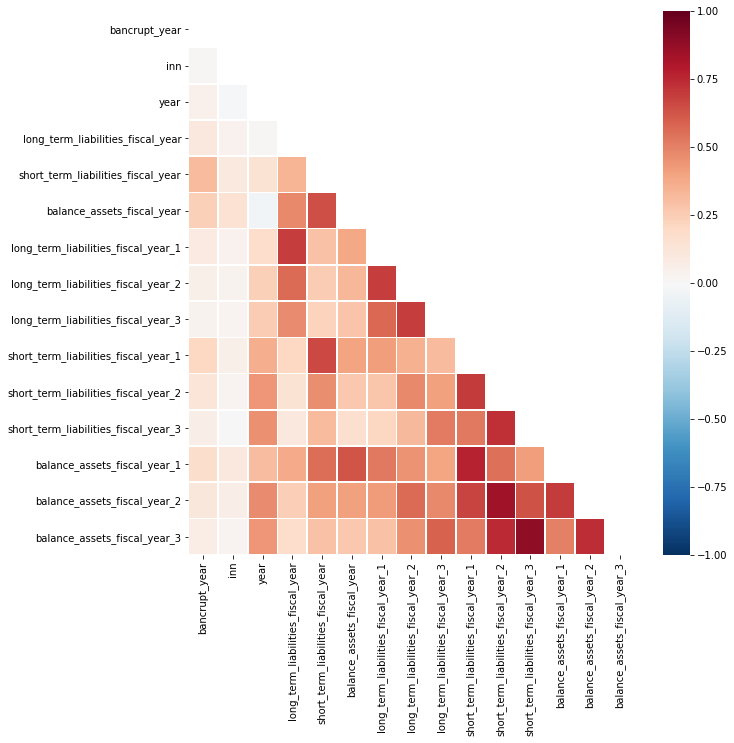

In [ ]:
#корреляционная матрица
mask=np.zeros_like(x.corr(method = 'spearman'))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(x.corr(method = 'spearman'),linewidths=0.7, cmap = 'RdBu_r', vmin=-1, vmax=1, mask=mask)

In [ ]:
# нормализация данных
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
# ранее было выявлена несбалансированность классов. поэтому необходимо провести семплинг. Установка специальной библиотеки
!pip install imbalanced-learn

In [ ]:
# бороться с несбалансированностью буду с помощью увеличения числа экземпляров минорного класса. для этого выбран алгоритм smote
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
y = y.to_numpy() 

In [ ]:
# семплинг
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


*Обучение моделей* 

Модель 1. Случайный лес

In [ ]:
# разбивка выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [ ]:
# random forest с grid search (подбором гиперпараметров)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
params = {   'max_depth': [10, 20, 30],
          'max_leaf_nodes': list(range(2, 20)),
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10, 20]
          }
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=0, cv=3, scoring='f1_macro')
grid_search_cv.fit(x_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
# лучший результат на обучающей выборке
grid_search_cv.best_score_

0.8743323567297149

In [ ]:
# лучшие гиперпараметры алгоритма
grid_search_cv.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 19,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

In [ ]:
# результат предсказания на тестовой выборке. Для оценки работы модели выбраны метрики: macro f1 score и roc-auc
pred = grid_search_cv.predict(x_test)
print(f1_score(y_test, pred, average='macro'))
print(roc_auc_score(y_test, pred))

0.8586118251928021
0.8586174993391489


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       194
           1       0.86      0.86      0.86       195

    accuracy                           0.86       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.86      0.86      0.86       389



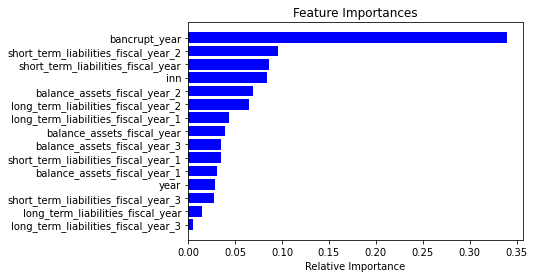

In [ ]:
# посмотрим, какие признаки оказали наибольшее влияние на работу модели
importances = grid_search_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# отберем фичи, которые оказывают влияние на работу модели, переформируем датасет и посмотрим на работу модели ещё раз
imp = {'bancrupt_year', 'inn',
       'short_term_liabilities_fiscal_year', 'balance_assets_fiscal_year',
       'long_term_liabilities_fiscal_year_1',
       'long_term_liabilities_fiscal_year_2',
       'short_term_liabilities_fiscal_year_1',
       'short_term_liabilities_fiscal_year_2'
       , 'balance_assets_fiscal_year_1',
       'balance_assets_fiscal_year_2'}

In [ ]:
x_imp = df[imp]
y_imp = df[target]

In [ ]:
x_imp = sc.fit_transform(x_imp)

In [ ]:
y_imp = y_imp.to_numpy()

In [ ]:
x_imp_sm, y_imp_sm = smt.fit_resample(x_imp, y_imp)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_imp,x_test_imp,y_train_imp,y_test_imp = train_test_split(x_imp_sm,y_imp_sm,test_size=0.2,random_state=42)

In [ ]:
# заново обучим модель на новых данных
grid_search_cv.fit(x_train_imp, y_train_imp)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
# результат на обучающей выборке
grid_search_cv.best_score_

0.886527138082358

In [ ]:
# результат на тестовой выборке
pred = grid_search_cv.predict(x_test_imp)
print(f1_score(y_test_imp, pred, average='macro'))
print(roc_auc_score(y_test_imp, pred))

0.8738225267269056
0.8739360296061326


Случайный лес показал хороший результат (более 0.85 на тестовой выборке в обоих случаях). Отбор более важных признаков слегка увеличивает значение метрик

Модель 2. Логистическая регрессия

In [ ]:
# логистическая регрессия с grid search
from sklearn.linear_model import LogisticRegression
params = {'C':np.logspace(-3,3,7), 
          'penalty':['l2', 'l1'],
          'max_iter': [1000, 2000, 5000]
}
cv_lr = GridSearchCV(LogisticRegression(random_state=42, solver = 'liblinear'), params, verbose=0, cv=3, scoring='f1_macro')
cv_lr.fit(x_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
# лучший результат на обучающей выборке
cv_lr.best_score_

0.743050127327671

In [ ]:
# лучший результат на тестовой выборке
pred = cv_lr.predict(x_test)
print(f1_score(y_test, pred, average='macro'))
print(roc_auc_score(y_test, pred))

0.7287530762920427
0.7373248744382764


Логистическая регрессия демонстрирует худший score, чем случайный лес (~ 0.73 против 0.87)

Модель 3. Градиентный бустинг

In [ ]:
#градиетный бустинг с grid search
from sklearn.ensemble import GradientBoostingClassifier
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [2, 4, 8],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
cv_boost = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=0, cv=3, scoring='f1_macro')
cv_boost.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
             iid=

In [ ]:
# лучший результат на обучающей выборке
cv_boost.best_score_

0.9323122057408658

In [ ]:
# лучшие параметры алгоритма
cv_boost.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10,
 'subsample': 0.618}

In [ ]:
# результат на тестовой выборке
pred = cv_boost.predict(x_test)
print(f1_score(y_test, pred, average='macro'))
print(roc_auc_score(y_test, pred))

0.9459797250381892
0.9459555908009517


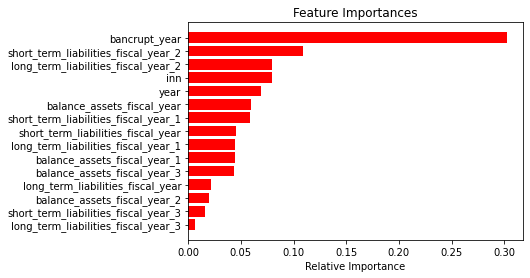

In [ ]:
# признаки, оказавшие наибольшее воияние на градиентный бустинг
importances = cv_boost.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# подготовка данных с отбором признаков и переобучение модели
b_features = ['bancrupt_year', 'inn', 'year',
       'short_term_liabilities_fiscal_year', 'balance_assets_fiscal_year',
       'long_term_liabilities_fiscal_year_2',
       'short_term_liabilities_fiscal_year_1',
       'short_term_liabilities_fiscal_year_2', 'balance_assets_fiscal_year_1', 'balance_assets_fiscal_year_1']

In [ ]:
x_b = df[b_features]
y_b = df[target]

In [ ]:
x_b_sm, y_b_sm = smt.fit_resample(x_b, y_b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_b_sm,y_b_sm,test_size=0.2,random_state=42)

In [ ]:
cv_boost.fit(x_train_b, y_train_b)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
             iid=

In [ ]:
# результат на обучающей выборке
cv_boost.best_score_

0.9439568969714373

In [ ]:
# результат на тестовой выборке
pred = cv_boost.predict(x_test_b)
print(f1_score(y_test_b, pred, average='macro'))
print(roc_auc_score(y_test_b, pred))

0.9434144406241736
0.9433914882368492


Градиентный бустинг показал результат более 0.93 на тестовой выборке в обоих случаях. Отбор более важных признаков несущественно влияет на результат

CatBoost и Lightgbm

In [ ]:
# установка CatBoost
!pip install CatBoost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [ ]:
# импорт классификатора
from catboost import CatBoostClassifier

In [ ]:
# Применяем GridSearh для более точной настройки параметров и лучшего обучения модели
catboost = CatBoostClassifier(    
)

catboost_param_grid = {
    'loss_function': ['Logloss'],
    'eval_metric': ['F1'],
  'subsample': [0.35],
    'max_depth': [3, 4, 6],
    'n_estimators': [100],
  'reg_lambda': [65],
     'min_child_samples' : [20],
    'model_size_reg' : [0.1],
    'grow_policy' : ['Depthwise', 'SymmetricTree'],
    'random_strength' : [0.35, 1],
    'bootstrap_type' : ['MVS', 'Bernoulli'],
    'bagging_temperature' : [50],
    'verbose': [1]    
}

catboost_gs = GridSearchCV(
    estimator=catboost,
    param_grid=catboost_param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=4,
    n_jobs=-1,
    return_train_score=True
)


catboost_gs.fit(x_train, y_train,
             eval_set=(x_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   34.1s finished


0:	learn: 0.8412875	test: 0.8384279	best: 0.8384279 (0)	total: 56.8ms	remaining: 5.63s
1:	learn: 0.8042204	test: 0.7868852	best: 0.8384279 (0)	total: 64.2ms	remaining: 3.15s
2:	learn: 0.8046921	test: 0.7887324	best: 0.8384279 (0)	total: 77.4ms	remaining: 2.5s
3:	learn: 0.8622822	test: 0.8609865	best: 0.8609865 (3)	total: 82.9ms	remaining: 1.99s
4:	learn: 0.8669287	test: 0.8603104	best: 0.8609865 (3)	total: 92.2ms	remaining: 1.75s
5:	learn: 0.8702032	test: 0.8758465	best: 0.8758465 (5)	total: 99.3ms	remaining: 1.55s
6:	learn: 0.8703495	test: 0.8719101	best: 0.8758465 (5)	total: 104ms	remaining: 1.38s
7:	learn: 0.8670850	test: 0.8727273	best: 0.8758465 (5)	total: 109ms	remaining: 1.25s
8:	learn: 0.8487637	test: 0.8590909	best: 0.8758465 (5)	total: 115ms	remaining: 1.16s
9:	learn: 0.8475362	test: 0.8571429	best: 0.8758465 (5)	total: 120ms	remaining: 1.08s
10:	learn: 0.8535179	test: 0.8643678	best: 0.8758465 (5)	total: 125ms	remaining: 1.01s
11:	learn: 0.8501742	test: 0.8611111	best: 0.875

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f1329626b10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_temperature': [50],
                         'bootstrap_type': ['MVS', 'Bernoulli'],
                         'eval_metric': ['F1'],
                         'grow_policy': ['Depthwise', 'SymmetricTree'],
                         'loss_function': ['Logloss'], 'max_depth': [3, 4, 6],
                         'min_child_samples': [20], 'model_size_reg': [0.1],
                         'n_estimators': [100], 'random_strength': [0.35, 1],
                         'reg_lambda': [65], 'subsample': [0.35],
                         'verbose': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=4)

In [ ]:
# результат на обучающей и тестовой выборке
print(f'Roc_auc score is {roc_auc_score(y_train, catboost_gs.best_estimator_.predict(x_train))}')
print(f'F1 score is {f1_score(y_train, catboost_gs.best_estimator_.predict(x_train))}')

print(f'Roc_auc score is {roc_auc_score(y_test, catboost_gs.best_estimator_.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, catboost_gs.best_estimator_.predict(x_test))}')

Roc_auc score is 0.8519907057278191
F1 score is 0.8702031602708804
Roc_auc score is 0.8582606397039387
F1 score is 0.8758465011286681


In [ ]:
# установка lightgbm
!pip install lightgbm

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import KFold


In [ ]:
# lightgbm classifier с grid search и kfold cross validation
gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=x_train, y=y_train)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=x_train, y=y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Foun

{'lambda_l1': 0, 'lambda_l2': 0, 'min_data_in_leaf': 30, 'num_leaves': 31, 'reg_alpha': 0.1} 0.9781060056010787


In [ ]:
 # результат на обучающей выборке
 lgb_model.best_score_

0.9781060056010787

In [ ]:
# результат на тестовой выборке
pred = lgb_model.predict(x_test)
print(f1_score(y_test, pred, average='weighted'))
print(roc_auc_score(y_test, pred))

0.9897168159057381
0.9897039386730109


Из специализированных библиотек градиентного бустинга lightgbm демонстрирует результат более 0.98 на тестовой выборке

**В результате обучения моделей можно сделать вывод, что модели на основе случайного леса и градиентного бустинга демонстрируют результат выше 0.85 на имеющихся данных**